# Emojidick

This assumes that you have a copy of the [emojidick dataset](http://emojidick.com). Talk to [Fred Benenson](http://fredbenenson.com/) for details.

You'll need to run `python` inside a `jupyter-notebook` with non-standard packages (listed below).

To get the part-of-speech analysis, you'll need to run [https://github.com/dbamman/book-nlp](book-nlp) on the English text.

The notebook expects to have the following data:
* `emojidick_packaged/emojidick.en` - English version
* `emojidick_packaged/emojidick.emj` - Emoji version
* `book-nlp-output/melville.moby.tokens` - `book-nlp` output

In [1]:
%matplotlib inline
from __future__ import print_function

from collections import Counter, defaultdict
import csv
import datetime
import itertools
import math
import string

And these need to be installed using `pip`:

In [2]:
import emoji as emoji_package
from IPython.display import display
from matplotlib import pyplot as mpl
from nltk import AlignedSent, IBMModel1, word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import scipy as sp
import seaborn

In [3]:
STOPS = set(t.lower() for t in stopwords.words('english'))
csv.field_size_limit(int(1e6))

def clean(tokens):
    return [t.lower() for t in tokens if not set(t).intersection(set(string.punctuation))]

def read_data(text, data):
    lines = []
    with open(text) as t, open(data) as d:
        for text_line, emoji_line in zip(t, d):
            lines.append((clean(word_tokenize(text_line.strip())), emoji_line.strip().split()))
    return lines

def counts(lines):
    c = Counter()
    for l in lines:
        c.update(l)
    return c

In [4]:
lines = read_data('emojidick_packaged/emojidick.en', 'emojidick_packaged/emojidick.emj')
print('Read {} translations'.format(len(lines)))

Read 9971 translations


## Frequency plots

Emoji frequencies don't follow Zipfian distributions.

In [5]:
tokens = counts(l[0] for l in lines)
emoji = counts(l[1] for l in lines)
print('Text\t{} types\t{} tokens'.format(len(tokens), sum(tokens.itervalues())))
print('Emoji\t{} types\t{} tokens'.format(len(emoji), sum(emoji.itervalues())))
print('Average sentence length\tTokens\t{:.1f}'.format(sum(tokens.values()) / float(len(lines))))
print('Average sentence length\tEmoji\t{:.1f}'.format(sum(emoji.values()) / float(len(lines))))
print('Average length diff\t{:.1f}'.format(sum(len(t) - len(e) for t, e in lines) / float(len(lines))))

Text	16454 types	207194 tokens
Emoji	470 types	93342 tokens
Average sentence length	Tokens	20.8
Average sentence length	Emoji	9.4
Average length diff	11.4


/usr/local/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


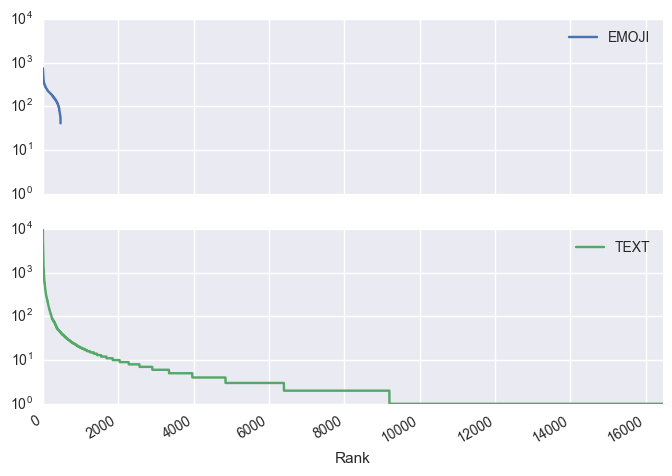

In [6]:
def plot(text, emoji, filename=None):
    text_it = sorted(text.itervalues(), reverse=True)
    emoji_it = sorted(emoji.itervalues(), reverse=True)
    t = pd.DataFrame({'Rank': i, 'EMOJI': e, 'TEXT': t} for i, (e, t)
                     in enumerate(itertools.izip_longest(emoji_it, 
                                                         text_it)))
    #help(t.plot)
    fig = t.plot(x='Rank', logy=True, ylim=(1, 10e3), subplots=True)
    if filename:
        mpl.savefig(filename)

plot(tokens, emoji, 'counts.pdf')

## Most-common Emoji

In [7]:
df = pd.DataFrame(({'emoji': emoji_package.emojize(e), 'count': c} for e, c in emoji.most_common(50)))
display(df)

,count,emoji
0,743,👲
1,724,💁
2,669,👸
3,637,:coffee:
4,626,🚑
5,607,:mortar_board:
6,598,🔑
7,574,🎡
8,556,🏬
9,537,✖


In [8]:
for t, c in tokens.most_common(50):
    print(u'{}\t{}'.format(c, t))

14167	the
6446	of
6309	and
4597	a
4512	to
4070	in
3042	that
2495	it
2495	his
2097	i
1875	he
1801	but
1721	as
1712	is
1688	with
1636	was
1592	for
1498	all
1376	this
1303	at
1208	not
1172	by
1072	from
1058	him
1047	so
1036	on
1029	be
1029	whale
898	one
879	you
852	there
779	now
767	had
756	have
691	or
676	were
650	they
629	me
626	then
625	which
612	some
605	their
600	when
597	what
590	an
586	my
586	are
578	no
572	like
561	upon


In [9]:
for (e, e_c), (t, t_c), (ns, ns_c) in zip(emoji.most_common(20), tokens.most_common(20), 
                                          [i for i in tokens.most_common(1000) if i[0] not in STOPS]):
    print("{}\t&\t{}\t&\t\emoji{}\t&\t{} \\\\".format(ns, ns_c, e.strip(':').replace('_', ''), e_c))

whale	&	1029	&	\emojimanwithguapimao	&	743 \\
one	&	898	&	\emojiinformationdeskperson	&	724 \\
like	&	572	&	\emojiprincess	&	669 \\
upon	&	561	&	\emojicoffee	&	637 \\
ahab	&	511	&	\emojiambulance	&	626 \\
man	&	497	&	\emojimortarboard	&	607 \\
ship	&	464	&	\emojikey	&	598 \\
old	&	435	&	\emojiferriswheel	&	574 \\
ye	&	433	&	\emojidepartmentstore	&	556 \\
would	&	429	&	\emojiheavymultiplicationx	&	537 \\
though	&	380	&	\emojigreyquestion	&	511 \\
sea	&	367	&	\emojiwhale	&	496 \\
yet	&	344	&	\emojigreyexclamation	&	442 \\
time	&	325	&	\emojieyes	&	439 \\
captain	&	323	&	\emojiboy	&	438 \\
long	&	315	&	\emojipersonwithpoutingface	&	419 \\
still	&	312	&	\emojiclap	&	415 \\
said	&	299	&	\emojiexclamation	&	407 \\
great	&	288	&	\emojiflushed	&	399 \\
boat	&	286	&	\emojiman	&	379 \\


## Learning an alignment model

In [10]:
def clean(t):
    return [i.lower() for i in t if not i.lower() in STOPS and not set(i).intersection(set(string.punctuation))]

def iter_alignments(model):
    counts = {}
    for t, d in model.translation_table.iteritems():
        for e, p in d.iteritems():
            counts[(t, e)] = p
    counts = counts.items()
    counts.sort(reverse=True, key=lambda i: i[1])
    for (t, e), p in counts:
        if t is None or e is None:
            continue
        yield t, e, p
        
def report_alignments(model):
    for i, (t, e, p) in enumerate(iter_alignments(model)):
        print(u'{:.3f}\t{}\t{}'.format(p, t, format_em(e)))
        if i == 200:
            break
            
def build_aligned(data):
    return [AlignedSent(e, t) for t, e in data if t and e]

data = [(clean(t), e) for t, e in lines]
print('Got {} pairs'.format(len(data)))
t_to_e_data = [AlignedSent(t, e) for t, e in data if t and e]
e_to_t_data = [AlignedSent(e, t) for t, e in data if t and e]
print('Got {} pairs - filtered'.format(len(t_to_e_data)))

Got 9971 pairs
Got 9734 pairs - filtered


## IBM Model 1 - No word order considered, one-to-one

In [11]:
start = datetime.datetime.now()
t_to_e_model = IBMModel1(t_to_e_data, 100)
print('Trained model in {}'.format(datetime.datetime.now() - start))
report_alignments(t_to_e_model)

Trained model in 0:04:24.495783


# What tokens do emojis map to?

We consider _all_ the tokens that each emoji is mapped to in the translation table, ranking by total probability mass in the translation table.

In [12]:
def obj_dist(model):
    def iter_pairs(model):
        for t, d in model.translation_table.iteritems():
            for s, p in d.iteritems():
                #if t is None or s is None:
                #    continue
                yield s, t, p
    by_obj = {}
    for s, t, p in iter_pairs(model):
        by_obj.setdefault(s, []).append((p, t))
    return list(sorted(((max(i[0] for i in dist), sp.stats.entropy(np.array([i[0] for i in dist])), s, dist) 
                        for s, dist in by_obj.items()),
                       reverse=True))

def format_em(em_name):
    e = emoji_package.emojize(em_name)
    if em_name == e:
        e = '?'
    return u'{} ({})'.format(e, em_name)

def format_emone(em_name):
    return '\\emoji{}'.format(e.strip(':').replace('_', ''))

In [13]:
by_emoji = obj_dist(t_to_e_model)
rows = []
for max_p, entropy, e, dist in by_emoji[:20]:
    dist = list(sorted(dist, reverse=True))
    e = format_emone(e) if e else None
    rows.append(u'{}\t&\t{}'.format(e, '\t&\t'.join(u'{}\t&\t{}'.format(t, '{:.2f}'.format(p)[1:])
                                     for p, t in dist[:3])))
for i, j in zip(rows[:10], rows[10:]):
    print(u'{}\t&\t{} \\\\'.format(i, j))

\emojiwhale	&	whale	&	.23	&	sperm	&	.06	&	whales	&	.05	&	\emojiman	&	man	&	.07	&	men	&	.05	&	ahab	&	.02 \\
\emojiledger	&	chapter	&	.15	&	book	&	.05	&	read	&	.03	&	\emojiship	&	ship	&	.07	&	lay	&	.02	&	vessel	&	.02 \\
None	&	one	&	.11	&	whale	&	.11	&	like	&	.06	&	\emojizzz	&	bed	&	.06	&	good	&	.03	&	sleeping	&	.02 \\
\emojione	&	chapter	&	.10	&	two	&	.02	&	one	&	.02	&	\emojidolphin	&	whale	&	.06	&	among	&	.03	&	sperm	&	.03 \\
\emojicop	&	captain	&	.08	&	sir	&	.06	&	know	&	.02	&	\emoji+1	&	good	&	.06	&	things	&	.03	&	man	&	.03 \\
\emojisunny	&	sun	&	.08	&	sunrise	&	.03	&	air	&	.03	&	\emojidroplet	&	water	&	.06	&	sea	&	.05	&	round	&	.02 \\
\emojisix	&	chapter	&	.08	&	straight	&	.02	&	beheld	&	.01	&	\emojiskull	&	death	&	.05	&	life	&	.03	&	dead	&	.03 \\
\emojieyes	&	see	&	.08	&	eyes	&	.05	&	seen	&	.03	&	\emojivirgo	&	whales	&	.05	&	sperm	&	.03	&	ancient	&	.02 \\
\emojispeedboat	&	boat	&	.07	&	ship	&	.03	&	boats	&	.03	&	\emojigreyexclamation	&	oh	&	.05	&	aye	&	.02	&	old	&	.02 \\
\emojihand

# Units of analysis

## Can we induce parts of speech from alignments?

We process the text using BookNLP, and calculate the POS distribution for each token. Pivoting by the token alignment probabilities, we can map each emoji to a POS distribution.

```
emoji <-(p_align)-> token <-(p_pos)-> POS
```

In [14]:
def iter_booknlp():
    # paragraphId	sentenceID	tokenId	beginOffset	endOffset	whitespaceAfter	headTokenId	
    # originalWord	normalizedWord	lemma	pos	ner	deprel	inQuotationcharacterId
    with open('book-nlp-output/melville.moby.tokens') as f:
        rows = csv.DictReader(f, delimiter='\t')
        for sentence_index, sentence_tokens in itertools.groupby(rows, lambda r: r.get('sentenceID')):
            yield list(sentence_tokens)

token_dist = Counter()
token_pos = {}
for sentence_tokens in iter_booknlp():
    for token in sentence_tokens:
        token_dist[token['originalWord'].lower()] += 1
        token_pos.setdefault(token['originalWord'].lower(), Counter())[token['pos']] += 1

# Normalise it all.
def normalise(d):
    return {p: c / float(sum(d.values())) for p, c in d.iteritems()}
token_pos = {t.lower(): normalise(d) for t, d in token_pos.iteritems()}
total = float(sum(token_dist.itervalues()))
token_dist = {t: c / total for t, c in token_dist.iteritems()}

In [15]:
emoji_pos = {}
for max_p, entropy, e, dist in by_emoji:
    dist = list(sorted(dist, reverse=True))
    for p_align, t in dist:
        pos_dist = token_pos.get(t.lower())
        if pos_dist is None:
            #print('No dist for {}'.format(t))
            continue
        for pos, p_pos in pos_dist.iteritems():
            pos = pos[:2]
            emoji_pos.setdefault(e, Counter())[pos] += p_align * p_pos
emoji_pos = {e: list(sorted(dist.items(), reverse=True, key=lambda i: i[1])) for e, dist in emoji_pos.iteritems()}

majority = {}
for e, dist in emoji_pos.iteritems():
    pos, p = dist[0]
    majority.setdefault(pos, []).append((p, e))

Perhaps unsurprisingly, emojis are most likely nouns.

In [16]:
for pos, emoji_items in majority.iteritems():
    print(pos)
    emoji_items = list(sorted(emoji_items, reverse=True))
    for p, e in emoji_items[:10]:
        print(u'\t{:.2f}\t{}'.format(p, format_em(e)))

VB
	0.37	👀 (:eyes:)
	0.36	? (:vs:)
	0.30	? (:smiley_cat:)
	0.29	? (:fries:)
	0.29	🎤 (:microphone:)
NN
	0.70	🐋 (:whale:)
	0.56	? (:leaves:)
	0.55	? (:gem:)
	0.53	? (:up:)
	0.52	? (:cop:)
	0.52	? (:open_hands:)
	0.52	🍞 (:bread:)
	0.52	? (:city_sunset:)
	0.51	☃ (:snowman:)
	0.51	👶 (:baby:)


This is the distribution of POS over all tokens.

This is the distribution of POS over all emojis. Nouns are still the most probable POS, but the distribution has a skinnier tail, as more mass has been shifted to Nouns in emoji. There seems to be limited alignment to IN, DT and `,`, so those ordinarily probable categories do not feature.

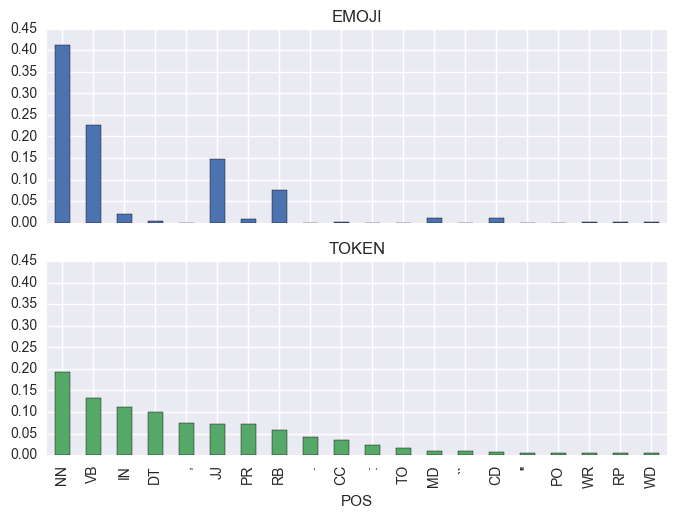

In [17]:
all_token_pos = Counter()
for t, p_t in token_dist.iteritems():
    for pos, p_pos in token_pos[t].iteritems():
        all_token_pos[pos[:2]] += p_t * p_pos

emoji_dist = Counter()
for _, emojis in data:
    emoji_dist.update(emojis)
total = float(sum(emoji_dist.itervalues()))
emoji_dist = {e: c / total for e, c in emoji_dist.iteritems()}
all_pos = Counter()
for e, p_e in emoji_dist.iteritems():
    for pos, p_pos in emoji_pos.get(e, []):
        all_pos[pos[:2]] += p_e * p_pos

ax = pd.DataFrame({'POS': pos, 'EMOJI': all_pos.get(pos), 
               'TOKEN': all_token_pos.get(pos)} for pos, p in all_token_pos.most_common(20))\
               .plot(kind='bar', x='POS', subplots=True, legend=False, ylim=(0, 0.45))
mpl.savefig('pos.pdf')

## Emoji bigram models

We can calculate the probability of pairs of consecutive tokens, and emojis. The emoji repetition rate is much higher than that of tokens.

In [18]:
def bigrams(seq):
    for i in xrange(len(seq) - 1):
        yield seq[i], seq[i+1]

pairs = Counter()
references = {}
token_repetitions, emoji_repetitions = Counter(), Counter()
for (text, emoji), sentence_tokens in zip(data, iter_booknlp()):
    for t_i, t_j in bigrams(text):
        token_repetitions[t_i == t_j] += 1
    for e_i, e_j in bigrams(emoji):
        key = u'{} {}'.format(format_em(e_i), format_em(e_j))
        emoji_repetitions[e_i == e_j] += 1
        pairs[key] += 1
        references.setdefault(key, Counter())[' '.join(text)] += 1

print('Token repetition rate: {:.3f}'.format(token_repetitions[True] / float(sum(token_repetitions.values()))))
print('Emoji repetition rate: {:.3f}'.format(emoji_repetitions[True] / float(sum(emoji_repetitions.values()))))

Token repetition rate: 0.004
Emoji repetition rate: 0.032


In [19]:
for p, c in pairs.most_common(100):
    print(u'{}\t{}'.format(p, c))

👲 (:man_with_gua_pi_mao:) 👸 (:princess:)	327
? (:mortar_board:) ? (:coffee:)	308
💁 (:information_desk_person:) 🚑 (:ambulance:)	306
👸 (:princess:) 🎡 (:ferris_wheel:)	306
🚑 (:ambulance:) ? (:mortar_board:)	305
? (:coffee:) 👲 (:man_with_gua_pi_mao:)	303
🔑 (:key:) 💁 (:information_desk_person:)	300
🏬 (:department_store:) 🔑 (:key:)	297
💑 (:couple_with_heart:) 💑 (:couple_with_heart:)	43
? (:muscle:) ? (:muscle:)	39
? (:grey_exclamation:) ? (:grey_exclamation:)	29
👦 (:boy:) 👦 (:boy:)	23
? (:question:) ? (:question:)	20
👦 (:boy:) 💂 (:guardsman:)	19
🌿 (:herb:) 🔔 (:bell:)	18
? (:o:) ? (:o:)	18
👸 (:princess:) 👲 (:man_with_gua_pi_mao:)	18
? (:fearful:) ? (:fearful:)	18
💜 (:purple_heart:) 💜 (:purple_heart:)	16
? (:eggplant:) 🌿 (:herb:)	16
🎡 (:ferris_wheel:) ? (:eggplant:)	16
🍧 (:shaved_ice:) ? (:mask:)	16
🎡 (:ferris_wheel:) 👸 (:princess:)	15
? (:stuck_out_tongue_winking_eye:) ? (:stuck_out_tongue_winking_eye:)	15
? (:zero:) ? (:zero:)	15
👸 (:princess:) 👩 (:woman:)	15
🔔 (:bell:) ? (:hash:)	14
👀 (:eye